In [1]:
#Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sn
import seaborn as sns
import scipy as sp
import gc
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import xgboost as xgb

In [3]:
# Baca file input dari user
input_file = input("Masukkan nama file input: ")

# Baca file input menggunakan library Pandas
datmin = pd.read_csv(input_file)

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088.0,0.0,393.0,321.0,348.0,35.088460,0.0,0.0,0.0,0.0,9.638510e+03,27.696867,43326.2,59304.016,108616.0,0.0,216631.0,43326.2,59304.016,108616.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,96,0,27.696867,0.0,321.0,393.0,344.14285,33.617596,1130.1428,0,0,0,0,0,0,0,0,0.0,401.5,348.0,0.0,0,0,0,0,0,0,6,2088,0,0,-1,-1,5,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
1,1,17,2,2,0,802.0,0.0,401.0,401.0,401.0,0.000000,0.0,0.0,0.0,0.0,4.010000e+08,1000000.000000,2.0,0.000,2.0,2.0,2.0,2.0,0.000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,1000000.000000,0.0,401.0,401.0,401.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,601.5,401.0,0.0,0,0,0,0,0,0,2,802,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
2,2,17,48,2,0,766.0,0.0,383.0,383.0,383.0,0.000000,0.0,0.0,0.0,0.0,1.595833e+07,41666.668000,48.0,0.000,48.0,48.0,48.0,48.0,0.000,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,40,0,41666.668000,0.0,383.0,383.0,383.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,574.5,383.0,0.0,0,0,0,0,0,0,2,766,0,0,-1,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
3,3,17,107319,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,0.0,0.0,0.0,0.0,1.302658e+04,37.272057,35773.0,61959.790,107318.0,0.0,107319.0,35773.0,61959.790,107318.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,37.272057,0.0,330.0,369.0,345.60000,21.361180,456.3000,0,0,0,0,0,0,0,0,0.0,432.0,349.5,0.0,0,0,0,0,0,0,4,1398,0,0,-1,-1,3,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack
4,4,17,107271,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,0.0,0.0,0.0,0.0,1.340530e+04,37.288734,35757.0,61931.207,107269.0,1.0,107271.0,35757.0,61931.207,107269.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,32,0,37.288734,0.0,330.0,389.0,353.60000,32.315630,1044.3000,0,0,0,0,0,0,0,0,0.0,442.0,359.5,0.0,0,0,0,0,0,0,4,1438,0,0,-1,-1,3,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP,Attack


In [4]:
datmin.corr()

<ipython-input-4-88b074b1b406>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datmin.corr()


,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Unnamed: 0,1.000000,0.323490,-0.257691,0.105424,-0.015288,0.277070,-0.001345,0.157223,0.110746,0.201913,0.071884,-0.018762,-0.042924,-0.033002,-0.022072,0.014530,0.024743,-0.371453,-0.358524,-0.273580,-0.003927,-0.257076,-0.366331,-0.341433,-0.273123,-0.003972,-0.117134,-0.166816,-0.160237,-0.141591,-0.086262,-0.039163,NaN,NaN,NaN,0.047095,-0.002978,0.026951,-0.026478,0.111516,0.088557,0.201147,0.031050,0.006241,NaN,-0.006577,-0.039163,NaN,-0.334195,-0.059335,-0.034000,NaN,-0.079938,0.104598,0.201913,-0.033002,NaN,NaN,NaN,NaN,NaN,NaN,0.105424,0.277070,-0.015288,-0.001345,-0.100730,-0.013965,0.384218,0.033614,-0.047457,-0.079535,-0.074549,-0.017960,-0.208651,-0.203681,-0.229494,-0.176458
Protocol,0.323490,1.000000,-0.546260,0.035973,-0.062535,0.152277,-0.024154,0.440949,0.652593,0.679051,-0.168704,-0.224441,0.096124,-0.194346,-0.261747,0.130998,0.057402,-0.471242,-0.506812,-0.499068,-0.012013,-0.541032,-0.519060,-0.509979,-0.493025,-0.009708,-0.357304,-0.358933,-0.368777,-0.367723,-0.176017,-0.267371,NaN,NaN,NaN,-0.085286,-0.013034,0.064451,-0.085965,0.655818,0.135065,0.648224,-0.219775,-0.108199,NaN,-0.036964,-0.267371,NaN,-0.740684,-0.518238,-0.361897,NaN,-0.331229,0.583157,0.679051,-0.194346,NaN,NaN,NaN,NaN,NaN,NaN,0.035973,0.152277,-0.062535,-0.024154,-0.483816,-0.238108,0.177786,-0.091669,-0.143486,-0.178643,-0.193124,-0.082855,-0.495488,-0.398802,-0.525884,-0.440042
Flow Duration,-0.257691,-0.546260,1.000000,-0.007787,0.096673,-0.087828,0.032873,-0.096705,-0.338135,-0.346651,0.211235,0.284785,-0.065465,0.189297,0.286532,-0.087687,-0.120858,0.671394,0.779231,0.863104,0.020458,0.998839,0.758699,0.812286,0.862893,0.021024,0.792541,0.572458,0.639084,0.716317,0.023097,0.011446,NaN,NaN,NaN,0.035292,0.008180,-0.119810,-0.021363,-0.338266,0.090842,-0.316899,0.243763,0.093101,NaN,-0.009071,0.011446,NaN,0.647042,-0.067013,-0.087956,NaN,-0.064000,-0.291200,-0.346651,0.189297,NaN,NaN,NaN,NaN,NaN,NaN,-0.007787,-0.087828,0.096673,0.032873,0.303153,-0.005054,-0.066553,0.039676,0.203164,0.321709,0.315668,0.082583,0.836919,0.556214,0.865779,0.770099
Total Fwd Packets,0.105424,0.035973,-0.007787,1.000000,0.176206,0.170466,0.168278,0.042839,0.022465,0.029914,0.006571,0.018521,-0.029618,0.017668,0.015167,-0.015304,-0.016557,-0.039750,-0.035231,-0.014523,-0.001846,-0.007532,-0.036490,-0.031294,-0.014150,-0.001671,0.008325,-0.011931,-0.008716,0.002306,-0.018395,-0.015359,NaN,NaN,NaN,0.011983,0.002285,-0.016155,-0.006223,0.022658,0.037457,0.035997,0.017123,0.018840,NaN,-0.002566,-0.015359,NaN,-0.025727,-0.034186,-0.026457,NaN,-0.036644,0.009073,0.029914,0.017668,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.170466,0.176206,0.168278,-0.012652,-0.013803,0.284551,0.008285,0.004924,0.004869,0.005615,0.003024,-0.003

Data Preparation

In [5]:
datmin.dtypes

Unnamed: 0                    int64
Protocol                      int64
Flow Duration                 int64
Total Fwd Packets             int64
Total Backward Packets        int64
Fwd Packets Length Total    float64
Bwd Packets Length Total    float64
Fwd Packet Length Max       float64
Fwd Packet Length Min       float64
Fwd Packet Length Mean      float64
Fwd Packet Length Std       float64
Bwd Packet Length Max       float64
Bwd Packet Length Min       float64
Bwd Packet Length Mean      float64
Bwd Packet Length Std       float64
Flow Bytes/s                float64
Flow Packets/s              float64
Flow IAT Mean               float64
Flow IAT Std                float64
Flow IAT Max                float64
Flow IAT Min                float64
Fwd IAT Total               float64
Fwd IAT Mean                float64
Fwd IAT Std                 float64
Fwd IAT Max                 float64
Fwd IAT Min                 float64
Bwd IAT Total               float64
Bwd IAT Mean                

In [6]:
#Jumlah baris dan kolom
datmin.shape

(431371, 80)

In [7]:
#Deskripsi dataset
datmin.describe(include='all')

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
count,431371.000000,431371.000000,4.313710e+05,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.0,431371.0,431371.0,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,4.313710e+05,431371.0,431371.000000,431371.000000,431371.0,431371.000000,431371.000000,431371.000000,431371.0,431371.000000,431371.000000,431371.000000,431371.000000,431371.0,431371.0,431371.0,431371.0,431371.0,431371.0,431371.000000,4.313710e+05,431371.000000,4.313710e+05,431371.000000,431371.000000,431371.000000,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,4.313710e+05,431371,431371
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DrDoS_NTP,Attack
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121368,333540
mean,126835.311055,13.948694,8.404856e+06,24.139117,2.472021,9.416956e+03,1.632896e+03,357.483674,294.721646,324.915327,20.208259,79.579538,8.727279,25.944262,21.049310,7.373761e+07,1.266888e+05,7.998733e+05,1.413245e+06,3.740800e+06,4.322362e+03,8.329522e+06,9.762455e+05,1.540342e+06,3.698763e+06,3.981457e+03,3.682354e+06,4.312665e+05,8.141553e+05,2.054230e+06,0.953933,0.027153,0.0,0.0,0.0,-4.073394e+07,-9.605009e+05,1.249394e+05,1.749381e+03,294.319340,407.184247,332.878668,31.989035,1.499810e+04,0.0,0.000533,0.027153,0.0,0.176410,0.094907,0.048647,0.0,0.244122,397.782367,324.915327,25.944262,0.0,0.0,0.0,0.0,0.0,0.0,24.139117,9.416956e+03,2.472021,1.632896e+03,2354.539580,794.469130,21.893124,-2.315406

In [8]:
#Penggunaan memory dataFrame
mb = datmin.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(mb))

Memory usage of dataframe is 263.29 MB


In [9]:
datmin.columns

Index(['Unnamed: 0', 'Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [10]:
#Pengecualian kolom yang tidak perlu
datmin_selected = datmin [[#'Unnamed: 0', 
        'Protocol', 
        #'Flow Duration',
        #'Total Fwd Packets',
       #'Total Backward Packets', 'Fwd Packets Length Total',
       #'Bwd Packets Length Total', 
       'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       #'Bwd Packet Length Min', 
       'Bwd Packet Length Mean',
       'Bwd Packet Length Std',
       #'Flow Bytes/s', 'Flow Packets/s',
       #'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       #'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       #'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       #'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       #'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       #'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance',
       #'FIN Flag Count',
       #'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       #'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 
       #'Down/Up Ratio',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       #'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       #'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       #'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       #'Subflow Bwd Bytes', 
       #'Init Fwd Win Bytes', 'Init Bwd Win Bytes',
       #'Fwd Act Data Packets', 'Fwd Seg Size Min', 
       #'Active Mean', 'Active Std','Active Max', 'Active Min',
       #'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min',
       #'Label',
       'Class']].copy()

In [11]:
datmin_selected.shape

(431371, 19)

In [12]:
datmin_selected.describe()

,Protocol,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size
count,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,431371.000000,4.313710e+05,4.313710e+05,431371.000000,431371.000000,431371.000000,431371.000000,4.313710e+05,431371.000000,431371.000000,431371.000000
mean,13.948694,357.483674,294.721646,324.915327,20.208259,79.579538,25.944262,21.049310,1.249394e+05,1.749381e+03,294.319340,407.184247,332.878668,31.989035,1.499810e+04,397.782367,324.915327,25.944262
std,4.966712,320.025929,273.298705,268.577313,70.946085,490.692889,125.562263,128.453618,4.121369e+05,3.235972e+04,272.771405,529.884620,267.658871,118.215193,2.049565e+05,362.519376,268.577313,125.562263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.480082e-03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,6.000000,37.000000,6.000000,32.000000,0.000000,0.000000,0.000000,0.000000,1.332588e+00,0.000000e+00,6.000000,58.000000,43.833332,0.000000,0.000000e+00,54.000000,32.000000,0.000000
50%,17.000000,440.000000,330.000000,428.000000,0.000000,0.000000,0.000000,0.000000,6.429421e+01,0.000000e+00,330.000000,440.000000,429.953500,0.000000,0.000000e+00,442.200000,428.000000,0.000000
75%,17.000000,516.000000,516.000000,516.000000,0.000000,0.000000,0.000000,0.000000,2.714118e+04,7.936003e-02,516.000000,516.000000,516.000000,21.361180,4.563000e+02,602.000000,516.000000,0.000000
max,17.000000,32120.000000,2131.000000,3015.290500,2221.556200,37960.000000,5011.060000,7045.095000,4.000000e+06,2.000000e+06,1472.000000,37960.000000,4023.945300,6616.562000,4.377889e+07,4025.778600,3015.290500,5011.060000


In [14]:
datmin_selected.isna().sum()

Protocol                  0
Fwd Packet Length Max     0
Fwd Packet Length Min     0
Fwd Packet Length Mean    0
Fwd Packet Length Std     0
Bwd Packet Length Max     0
Bwd Packet Length Mean    0
Bwd Packet Length Std     0
Fwd Packets/s             0
Bwd Packets/s             0
Packet Length Min         0
Packet Length Max         0
Packet Length Mean        0
Packet Length Std         0
Packet Length Variance    0
Avg Packet Size           0
Avg Fwd Segment Size      0
Avg Bwd Segment Size      0
Class                     0
dtype: int64

In [13]:
#Hapus data yang terduplikasi
datmin_selected.drop_duplicates(inplace=True)

In [15]:
datmin_selected.shape

(279596, 19)

In [16]:
#Penggunaan memory dataFrame
mb = datmin_selected.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(mb))

Memory usage of dataframe is 42.66 MB


In [17]:
#Korelasi antar kolom
datmin_selected.corr()

<ipython-input-17-6d4a5f79e289>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datmin_selected.corr()


,Protocol,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size
Protocol,1.000000,0.342640,0.697393,0.721749,-0.179570,-0.243205,-0.205820,-0.285974,0.122960,-0.040165,0.704062,0.027664,0.667369,-0.235647,-0.116604,0.641594,0.721749,-0.205820
Fwd Packet Length Max,0.342640,1.000000,0.523744,0.704927,0.660758,0.298353,0.199253,0.338253,0.155265,-0.026323,0.516839,0.621213,0.711071,0.443652,0.188133,0.689960,0.704927,0.199253
Fwd Packet Length Min,0.697393,0.523744,1.000000,0.921638,-0.211904,-0.199495,-0.238148,-0.208127,0.213343,-0.027000,0.992933,0.149388,0.856408,-0.237806,-0.081995,0.873726,0.921638,-0.238148
Fwd Packet Length Mean,0.721749,0.704927,0.921638,1.000000,0.068117,-0.126013,-0.183911,-0.120515,0.241465,-0.031434,0.913721,0.271384,0.933342,-0.065335,-0.027488,0.929164,1.000000,-0.183911
Fwd Packet Length Std,-0.179570,0.660758,-0.211904,0.068117,1.000000,0.472769,0.395236,0.539637,0.024737,-0.008424,-0.214801,0.550509,0.111494,0.715266,0.274750,0.082933,0.068117,0.395236
Bwd Packet Length Max,-0.243205,0.298353,-0.199495,-0.126013,0.472769,1.000000,0.809376,0.923324,-0.044055,-0.004384,-0.200394,0.902734,0.133242,0.876702,0.749445,0.094347,-0.126013,0.809376
Bwd Packet Length Mean,-0.205820,0.199253,-0.238148,-0.183911,0.395236,0.809376,1.000000,0.870874,-0.054578,-0.004014,-0.239976,0.694272,0.142314,0.877071,0.581474,0.101712,-0.183911,1.000000
Bwd Packet Length Std,-0.285974,0.338253,-0.208127,-0.120515,0.539637,0.923324,0.870874,1.000000,-0.045179,-0.004026,-0.208888,0.828384,0.139045,0.926059,0.624267,0.099069,-0.120515,0.870874
Fwd Packets/s,0.122960,0.155265,0.213343,0.241465,0.024737,-0.044055,-0.054578,-0.045179,1.000000,0.058525,0.214855,0.053683,0.233235,-0.017202,-0.008775,0.282922,0.241465,-0.054578
Bwd Packets/s,-0.040165,-0.026323,-0.027000,-0.031434,-0.008424,-0.004384,-0.004014,-0.004026,0.058525,1.000000,-0.029747,-0.016264,-0.033335,-0.004734,-0.001420,-0.031149,-0.031434,-0.004014


In [18]:
datmin_selected.dtypes

Protocol                    int64
Fwd Packet Length Max     float64
Fwd Packet Length Min     float64
Fwd Packet Length Mean    float64
Fwd Packet Length Std     float64
Bwd Packet Length Max     float64
Bwd Packet Length Mean    float64
Bwd Packet Length Std     float64
Fwd Packets/s             float64
Bwd Packets/s             float64
Packet Length Min         float64
Packet Length Max         float64
Packet Length Mean        float64
Packet Length Std         float64
Packet Length Variance    float64
Avg Packet Size           float64
Avg Fwd Segment Size      float64
Avg Bwd Segment Size      float64
Class                      object
dtype: object

Pembagian data ke training dan testing

In [19]:
X = datmin_selected .drop(columns='Class')
X.head()

,Protocol,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size
0,17,393.0,321.0,348.0,35.088460,0.0,0.0,0.0,27.696867,0.0,321.0,393.0,344.14285,33.617596,1130.1428,401.5,348.0,0.0
1,17,401.0,401.0,401.0,0.000000,0.0,0.0,0.0,1000000.000000,0.0,401.0,401.0,401.00000,0.000000,0.0000,601.5,401.0,0.0
2,17,383.0,383.0,383.0,0.000000,0.0,0.0,0.0,41666.668000,0.0,383.0,383.0,383.00000,0.000000,0.0000,574.5,383.0,0.0
3,17,369.0,330.0,349.5,22.516660,0.0,0.0,0.0,37.272057,0.0,330.0,369.0,345.60000,21.361180,456.3000,432.0,349.5,0.0
4,17,389.0,330.0,359.5,34.063667,0.0,0.0,0.0,37.288734,0.0,330.0,389.0,353.60000,32.315630,1044.3000,442.0,359.5,0.0


In [20]:
y = datmin_selected['Class']
y.head()

0    Attack
1    Attack
2    Attack
3    Attack
4    Attack
Name: Class, dtype: object

In [21]:
#Split data
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=5)

print('Training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('Testing dataset')
print(X_test.shape)
print(y_test.shape)
print()

Training dataset
(195717, 18)
(195717,)

Testing dataset
(83879, 18)
(83879,)



Data Modeling Decision Tree

In [22]:
# Membuat classifier Decision Tree
clf = DecisionTreeClassifier()

# Melatih classifier dengan set training
clf.fit(X_train, y_train)

# Melakukan Prediksi dengan set testing
y_pred = clf.predict(X_test)

# Evaluasi performa model dengan Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9959703859130414


KNN

In [ ]:
#K Nearest Neighbor
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

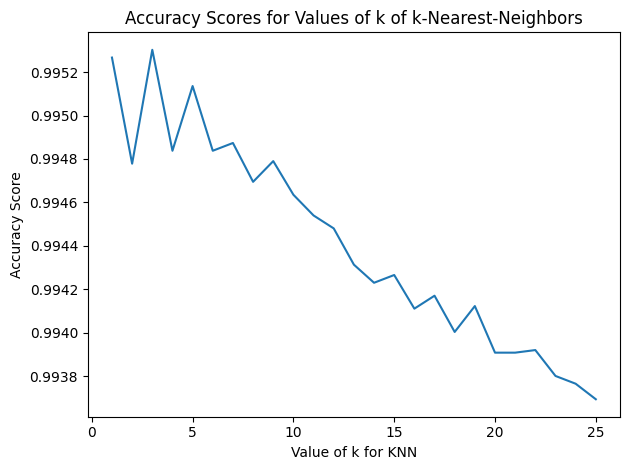

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=200) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

In [ ]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.9936932962958548


In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [ ]:
print(y_pred)

['Benign' 'Attack' 'Attack' ... 'Benign' 'Attack' 'Benign']


Decision Tree

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     61454
      Benign       0.99      0.99      0.99     22425

    accuracy                           1.00     83879
   macro avg       1.00      0.99      0.99     83879
weighted avg       1.00      1.00      1.00     83879



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[61298   156]
 [  169 22256]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.9961253710702321
